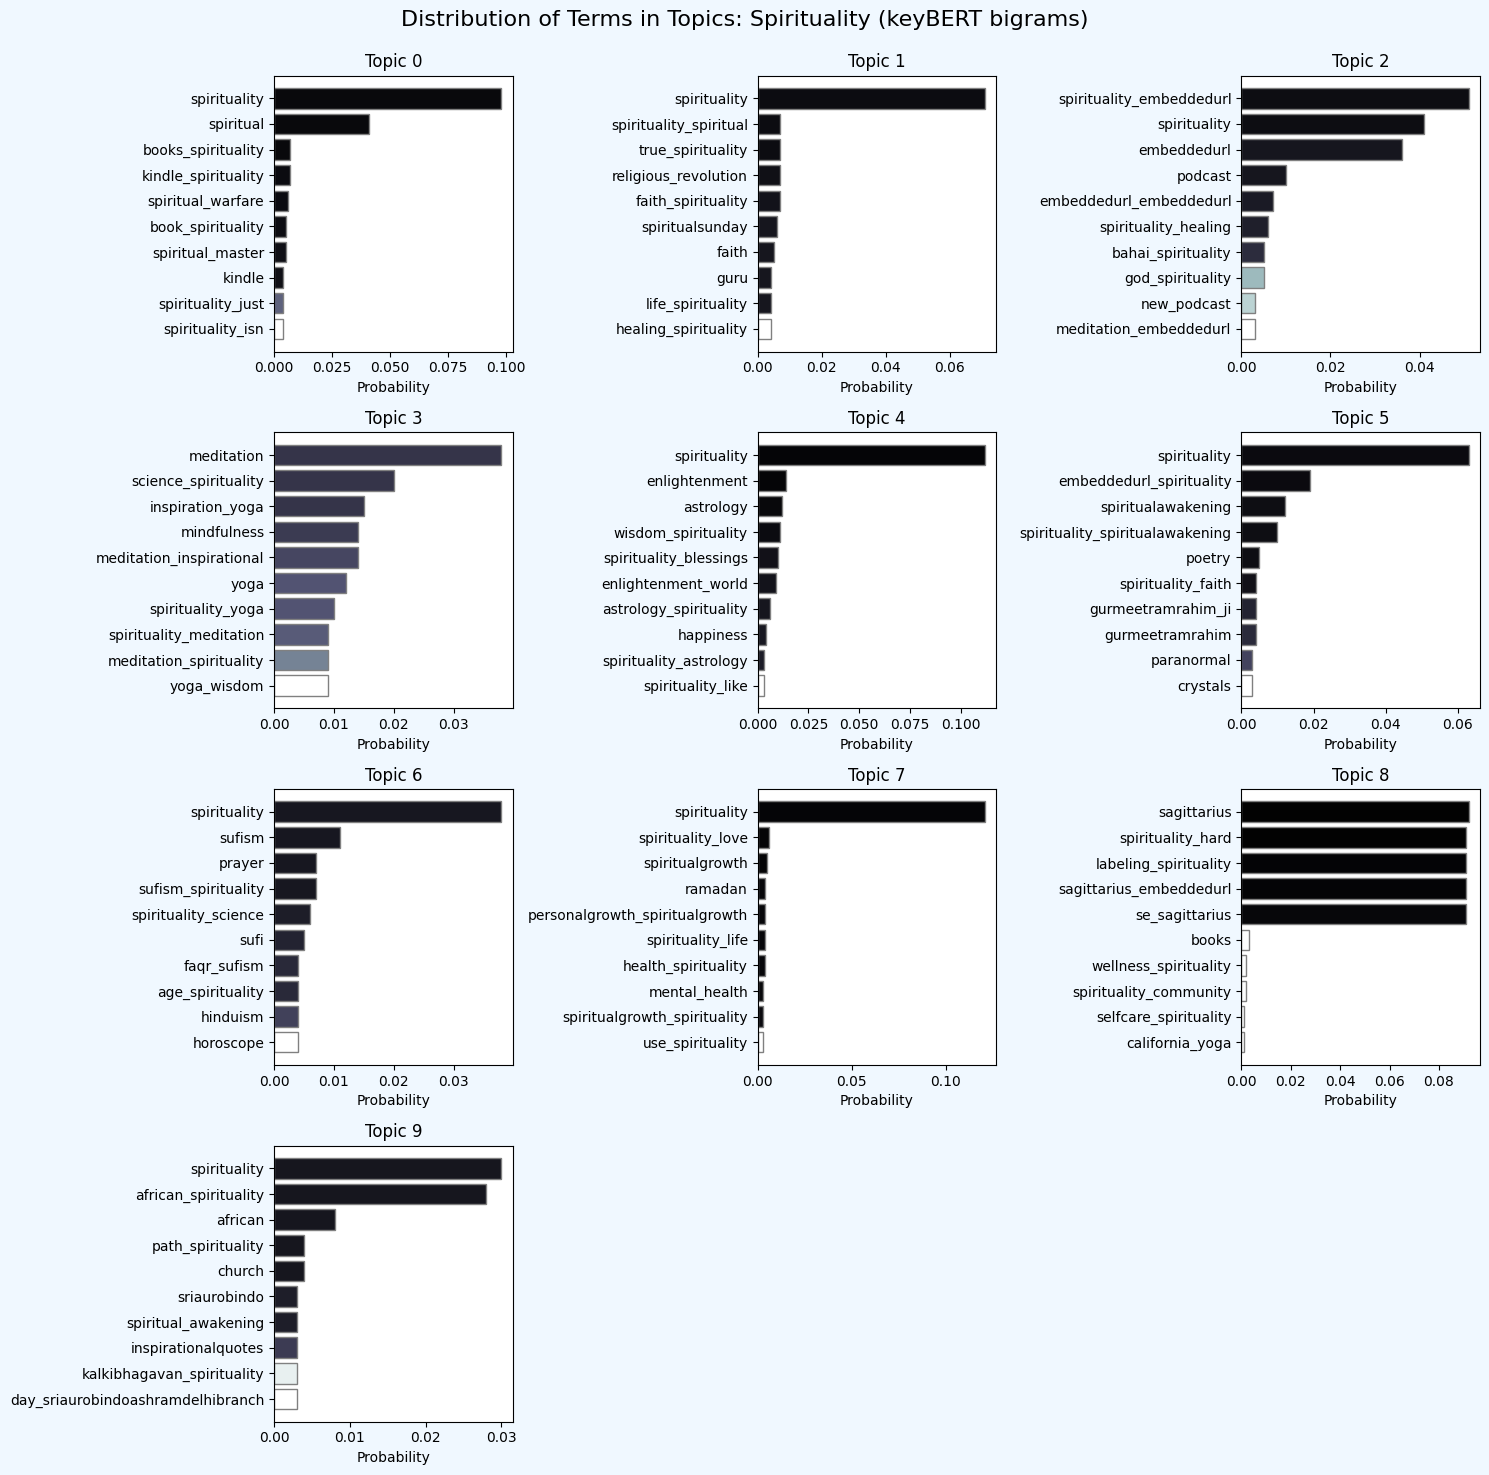

In [18]:
import os
import pandas as pd
from gensim.models.wrappers import LdaMallet
import matplotlib.pyplot as plt
import numpy as np


def plot_lda_topics(topics, num_rows, num_cols, suptitle, save_dir=None, model_name=None):
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))  # Adjust figsize for more vertical space

    # Fill the remaining subplots with empty plots
    for i in range(len(topics), num_rows * num_cols):
        row = i // num_cols
        col = i % num_cols
        axs[row, col].axis('off')

    for i, (topic_num, topic_terms) in enumerate(topics):
        row = i // num_cols
        col = i % num_cols

        terms = [term.split('"')[1] for term in topic_terms.split(' + ')]
        weights = [float(weight.split('*')[0]) for weight in topic_terms.split(' + ')]

        normalized_weights = np.array(weights) / max(weights)
        colors = plt.cm.bone(normalized_weights)

        axs[row, col].barh(terms[::-1], weights[::-1], color=colors, edgecolor='grey')  # Add grey border
        axs[row, col].set_xlabel('Probability')
        axs[row, col].set_title(f'Topic {topic_num}')

    fig.patch.set_facecolor('aliceblue') 
    plt.suptitle(suptitle, fontsize=16)

    # Adjust layout to allocate more space for y-axis labels
    plt.subplots_adjust(wspace=0.4, hspace=0.5)

    plt.tight_layout()

    if save_dir and model_name:
        os.makedirs(save_dir, exist_ok=True)  # Create the directory if it doesn't exist
        save_filename = f"{model_name}_plot_distribution.png"
        save_path = os.path.join(save_dir, save_filename)
        plt.savefig(save_path, bbox_inches='tight')  # Save the figure as PNG
    else:
        plt.show()

# Example usage
model_path = '/Users/shtosti/Dropbox/study/UZH/FW23/SMA/topic_modelling/Mallet/keyBERT_bigrams/models/lda_spirituality' # TODO change model path
suptitle = 'Distribution of Terms in Topics: Spirituality (keyBERT bigrams)\n' # TODO change suptitle
output_dir = '../visualizations_term_distributions' 

# Extract model name from the model path
model_name = os.path.splitext(os.path.basename(model_path))[0]

lda_model = load_lda_model(model_path)
topics = extract_topics(lda_model)

plot_lda_topics(topics, num_rows=4, num_cols=3, suptitle=suptitle, save_dir=output_dir, model_name=model_name)


In [ ]:
import os
import pandas as pd
from gensim.models.wrappers import LdaMallet
import matplotlib.pyplot as plt
import numpy as np

def plot_lda_topics(topics, num_rows, num_cols, suptitle, save_dir=None, model_name=None):
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 6))  # Adjust figsize for more horizontal space

    # Fill the remaining subplots with empty plots
    for i in range(len(topics), num_rows * num_cols):
        row = i // num_cols
        col = i % num_cols
        axs[row, col].axis('off')

    for i, (topic_num, topic_terms) in enumerate(topics):
        row = i // num_cols
        col = i % num_cols

        terms = [term.split('"')[1] for term in topic_terms.split(' + ')]
        weights = [float(weight.split('*')[0]) for weight in topic_terms.split(' + ')]

        normalized_weights = np.array(weights) / max(weights)
        colors = plt.cm.bone(normalized_weights)

        axs[row, col].barh(terms[::-1], weights[::-1], color=colors, edgecolor='grey')  # Add grey border
        axs[row, col].set_xlabel('Probability')
        axs[row, col].set_title(f'Topic {topic_num}')

    fig.patch.set_facecolor('aliceblue') 
    plt.suptitle(suptitle, fontsize=16)

    # Adjust layout to allocate more space for y-axis labels
    plt.subplots_adjust(wspace=0.4, hspace=0.5)

    plt.tight_layout()

    if save_dir and model_name:
        os.makedirs(save_dir, exist_ok=True)  # Create the directory if it doesn't exist
        save_filename = f"{model_name}_plot_distribution_2.png"
        save_path = os.path.join(save_dir, save_filename)
        plt.savefig(save_path, bbox_inches='tight')  # Save the figure as PNG
    else:
        plt.show()

# Example usage
model_path = '/Users/shtosti/Dropbox/study/UZH/FW23/SMA/topic_modelling/Mallet/keyBERT_bigrams/models/lda_spirituality' # TODO change model path
suptitle = 'Distribution of Terms in Topics: Spirituality (keyBERT bigrams)\n' # TODO change suptitle
output_dir = '../visualizations_term_distributions' 

# Extract model name from the model path
model_name = os.path.splitext(os.path.basename(model_path))[0]

lda_model = load_lda_model(model_path)
topics = extract_topics(lda_model)

plot_lda_topics(topics, num_rows=2, num_cols=5, suptitle=suptitle, save_dir=output_dir, model_name=model_name)
